In [1]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Car details v3.csv')

In [3]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# Descripción de los datos
Datos.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en año: ",Datos['year'].isin([0]).sum())
print("Cantidad de Registros con cero en precio de venta: ",Datos['selling_price'].isin([0]).sum())
print("Cantidad de Registros con cero en km conducidos: ",Datos['km_driven'].isin([0]).sum())
print("Cantidad de Registros con cero en puestos: ",Datos['seats'].isin([0]).sum())

Cantidad de Registros con cero en año:  0
Cantidad de Registros con cero en precio de venta:  0
Cantidad de Registros con cero en km conducidos:  0
Cantidad de Registros con cero en puestos:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

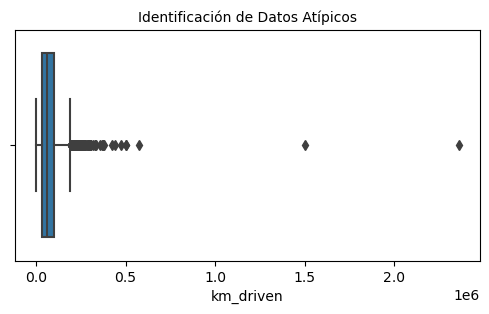

In [8]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['km_driven'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [10]:
#Conteo de Datos Atípicos

nivel_minimo=20
nivel_maximo=600000
Total_Atipicos=((Datos['km_driven']<nivel_minimo)|(Datos['km_driven']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 3


In [11]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['km_driven']<nivel_maximo)&(Datos['km_driven']>nivel_minimo)]

In [12]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['km_driven']<nivel_minimo)|(Datos['km_driven']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [25]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8125 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8125 non-null   object 
 1   year           8125 non-null   int64  
 2   selling_price  8125 non-null   int64  
 3   km_driven      8125 non-null   int64  
 4   fuel           8125 non-null   object 
 5   seller_type    8125 non-null   object 
 6   transmission   8125 non-null   object 
 7   owner          8125 non-null   object 
 8   mileage        7904 non-null   object 
 9   engine         7904 non-null   object 
 10  max_power      7910 non-null   object 
 11  torque         7903 non-null   object 
 12  seats          7904 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 888.7+ KB


In [26]:
Datos['selling_price'].value_counts()

selling_price
300000     227
600000     213
350000     209
550000     203
450000     195
          ... 
308000       1
3900000      1
2850000      1
39000        1
746000       1
Name: count, Length: 676, dtype: int64

In [27]:
Datos[['selling_price']].head()

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000


In [29]:
from sklearn.model_selection import train_test_split

# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento
X = Datos.drop('selling_price', axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['selling_price'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0) # Se omite stratify=Y


In [30]:
print (X_train)

                                      name  year  km_driven    fuel  \
601   Ford Ecosport 1.5 Ti VCT MT Titanium  2015      20000  Petrol   
1601                      Renault KWID RXT  2017      34000  Petrol   
4943               Mahindra XUV500 W10 2WD  2015      39000  Diesel   
7495              Jeep Compass 2.0 Limited  2017     120000  Diesel   
2104               Hyundai Elantra CRDi SX  2015     145000  Diesel   
...                                    ...   ...        ...     ...   
4933                       Maruti Omni CNG  2000     100000     CNG   
3265           Hyundai i20 1.4 Asta Option  2017      48000  Diesel   
1653             Hyundai i10 Sportz Option  2009      90000  Petrol   
2608          Hyundai Verna 1.6 CRDi EX MT  2013      87185  Diesel   
2733                     Maruti Ertiga VDI  2013      30000  Diesel   

     seller_type transmission         owner     mileage   engine  max_power  \
601   Individual       Manual  Second Owner   15.8 kmpl  1499 CC    

In [31]:
print (Y_train)

601      555000
1601     350000
4943    1225000
7495    1550000
2104     900000
         ...   
4933      80000
3265     670000
1653     170000
2608     445000
2733     600000
Name: selling_price, Length: 6093, dtype: int64


In [34]:
# Seleccionar solo las columnas numéricas
X_train_numeric = X_train.select_dtypes(include=['number'])

# Ahora X_train_numeric contiene solo las columnas numéricas

In [37]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Imputar los valores faltantes con la media de cada columna
imputer = SimpleImputer(strategy='mean')
X_train_numeric_imputed = imputer.fit_transform(X_train_numeric)

# Construir el modelo de regresión lineal
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train_numeric_imputed, Y_train)


LinearRegression()

In [49]:
import pandas as pd

# Cargar el archivo original
datos = pd.read_csv('./Car details v3.csv')

# Seleccionar solo las columnas numéricas
datos_numericos = datos.select_dtypes(include=['number'])

# Guardar el nuevo DataFrame en un archivo CSV
datos_numericos.to_csv('Car_details_v3NOnumbers.csv', index=False)


In [53]:
from sklearn.impute import SimpleImputer

# Crear un imputador para reemplazar los valores faltantes por la media
imputer = SimpleImputer(strategy='mean')

# Aplicar la imputación a los datos de entrenamiento
X_train_imputed = imputer.fit_transform(X_train)

# Ahora puedes continuar con el entrenamiento del modelo utilizando X_train_imputed en lugar de X_train
modelo_regresion.fit(X_train_imputed, y_train)


LinearRegression()

In [55]:
# Entrenar el modelo de regresión lineal con los datos de entrenamiento imputados
modelo_regresion.fit(X_train_imputed, y_train)

LinearRegression()

In [56]:
# Imputar valores faltantes en los datos de prueba
X_test_imputed = imputer.transform(X_test)

# Hacer predicciones sobre los datos de prueba imputados
predicciones = modelo_regresion.predict(X_test_imputed)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, predicciones)
print("Error cuadrático medio:", mse)

# Calcular el coeficiente de determinación
r2 = r2_score(y_test, predicciones)
print("Coeficiente de determinación:", r2)

Error cuadrático medio: 535911151950.3664
Coeficiente de determinación: 0.1824197205664927


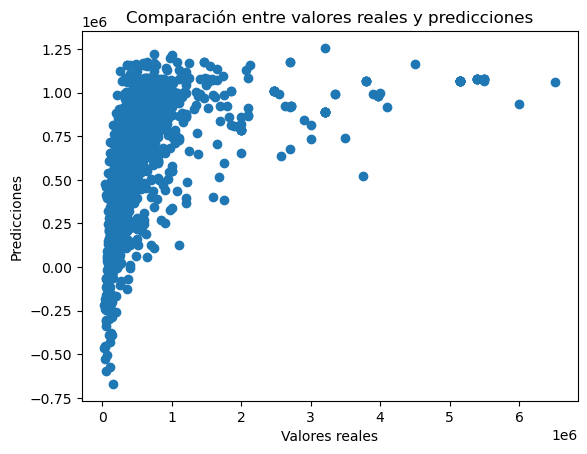

In [58]:
import matplotlib.pyplot as plt

# Graficar las predicciones vs. los valores reales
plt.scatter(y_test, predicciones)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre valores reales y predicciones")
plt.show()